<a href="https://colab.research.google.com/github/robinjameslee/Realized-Volatility-Calculation/blob/main/Realized_Volatility_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating the Realized Volatility of Stocks

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt

In [ ]:
def get_vol(ticker, start_date, end_date):
    df = query_data(ticker, start_date, end_date)
    df = calculate_vol(df)
    plot_vol(ticker, df)

def query_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    df['log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1)).fillna(0)
    return df

def calculate_vol(df):
    trading_days_in_1_year = 252
    df['10_day_vol'] = df['log_return'].rolling(10).std() * np.sqrt(trading_days_in_1_year)
    df['30_day_vol'] = df['log_return'].rolling(30).std() * np.sqrt(trading_days_in_1_year)
    df['60_day_vol'] = df['log_return'].rolling(60).std() * np.sqrt(trading_days_in_1_year)
    df['100_day_vol'] = df['log_return'].rolling(100).std() * np.sqrt(trading_days_in_1_year)
    return df
  
def plot_vol(ticker, df):
    fig = plt.figure(figsize = (18,8))
    plt.plot(df['10_day_vol'])
    plt.plot(df['30_day_vol'])
    plt.plot(df['60_day_vol'])
    plt.plot(df['100_day_vol'])
    plt.legend(['10_day_vol', '30_day_vol', '60_day_vol', '100_day_vol'])
    plt.xlabel("Date")
    plt.ylabel("Realized Vol")
    plt.show()

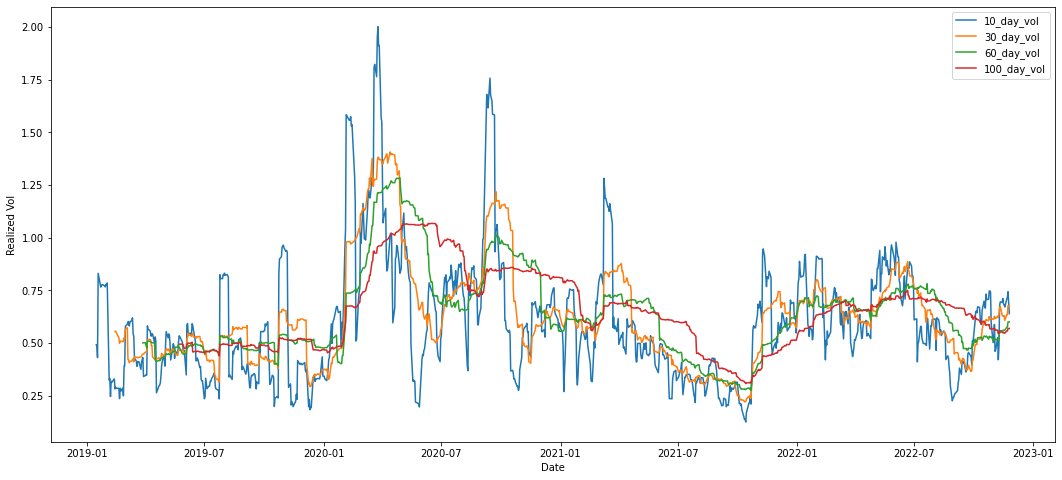

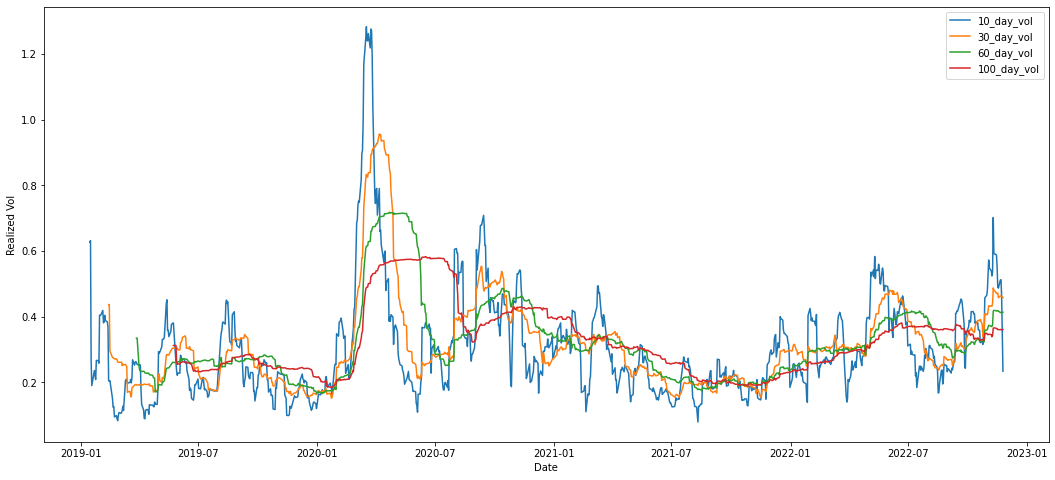

In [ ]:
get_vol('TSLA', '2019-01-01', '2022-11-26')
get_vol('AAPL', '2019-01-01', '2022-11-26')